In [1]:
import numpy as np
import pandas as pd
import time

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk("input"):
    print(dirname)

input
input\evaluation
input\test
input\training


In [2]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
data_path = Path('input/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [3]:
#已解決的ID
solved_id=set()
solved_eva_id=set()

In [4]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

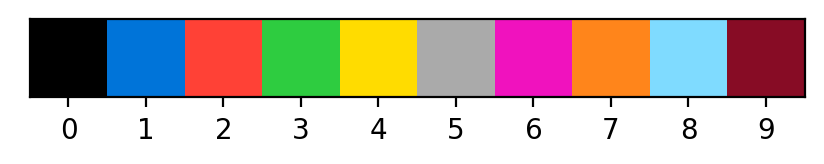

In [5]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [6]:

def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [7]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [8]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

In [9]:
background=0
#A:pattern
def is_juxt(A,B):
    background=0 #
    if -1 in B:
        return 0
    if len(np.unique(B))==1 and np.unique(B)[0]==0:
        return 0
    n=len(A)
    m=len(A[0])
    if len(B)!=n or len(B[0])!=m:
        return 0
    count=0
    for i in range(n):
        for j in range(m):
            if A[i][j]==background and B[i][j]!=background:
                return 0
            elif A[i][j]!=background and B[i][j]!=background and B[i][j]!=A[i][j]:
                return 0
            elif  B[i][j]==A[i][j]:
                count+=1
            
    return count/(m*n)

In [10]:
def issubarray(A0,B0):
    A=np.array(A0)
    B=np.array(B0)
    a1=A.shape[0]
    a2=A.shape[1]
    b1=B.shape[0]
    b2=B.shape[1]
    if (a1==b1 and a2==b2) or b1>a1 or b2>a2 or(b1==1 and b2==1):
        return False
    c1=a1-b1+1
    c2=a2-b2+1
    for i in range(c1):
        for j in range(c2):
            if (A[i:i+b1,j:j+b2]==B).all():
                return True
    return False

In [11]:
A=[[0,0,1,1,2,2,1],[0,0,0,1,1,1,1],[0,0,0,1,1,1,1],[0,0,0,1,1,1,1],[0,0,0,1,1,1,1],[0,0,0,1,1,1,2]]
B=[[0,0,0,0,0,0,0],[0,0,0,1,1,0,1],[0,0,0,0,0,0,0],[0,0,0,0,0,1,0],[0,0,0,1,0,0,0],[0,0,0,1,0,0,0]]
C=[[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]]

In [12]:
is_juxt(A,B)

0.5476190476190477

In [13]:
A1=np.array(A)
A1[1:3,:]=0



In [14]:
C=np.pad(A1,((1,1),(1,1)),"constant",constant_values=0)
C

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 2, 2, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 1, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [15]:
np.sum(C[1:2,3:8])==np.sum(C[1-1:2+1,3-1:8+1])

True

In [16]:
np.sum(C[1-1:2+1,3-1:8+1])

7

In [17]:
len(np.unique(C))
float(1.0)==int(1)

True

In [18]:
#juxt pattern to whole image
#list list
def juxt_pattern_to_image0(pattern,image):
    image_array=np.pad(image,((1,1),(1,1)),"constant",constant_values=0)
    image_array_copy=image_array.copy()
    pattern_array=np.array(pattern)
    a=len(pattern)
    b=len(pattern[0])
    m,n=len(image),len(image[0])
    
#     def min_req(pattern,image_part):
#         res=[]
#         b=list(np.nonzero(np.unique(image_part))[0])
#         for i in range(1,len(color_counts(pattern))):
#             if  i in b:
#                 res.append(color_counts(pattern)[i])
#         if len(res)==0:
#             return -1

#         return min(res)
    
    while True:
        max_pro=0
        for i in range(1,m-a+1+1):
            for j in range(1,n-b+1+1):
                tmp_image=image_array[i:i+a,j:j+b].tolist()
                if np.sum(image_array[i:i+a,j:j+b])!=np.sum(image_array[i-1:i+a+2,j-1:j+b+2]):
                    
                    continue

                if is_juxt(pattern,tmp_image)!=0:
                    max_pro=max(max_pro,is_juxt(pattern,tmp_image))
                    
#         print(image_array)
#         print(image_array_copy)
        if max_pro==0:
            return image_array_copy[1:-1,1:-1].tolist()
        
        for i in range(1,m-a+1+1):
            for j in range(1,n-b+1+1):
                tmp_image=image_array[i:i+a,j:j+b].tolist()
                if is_juxt(pattern,tmp_image)==max_pro:
                    image_array_copy[i:i+a,j:j+b]=pattern_array
                    
                    image_array[i:i+a,j:j+b]=-1
                    


#pattern 都有問題

In [19]:
# #juxt pattern to whole image
# #list list
# def juxt_pattern_to_image0(pattern,image):
#     image_array=np.array(image)
#     image_array_copy=image_array.copy()
#     pattern_array=np.array(pattern)
#     a=len(pattern)
#     b=len(pattern[0])
#     m,n=len(image),len(image[0])
    
# #     def min_req(pattern,image_part):
# #         res=[]
# #         b=list(np.nonzero(np.unique(image_part))[0])
# #         for i in range(1,len(color_counts(pattern))):
# #             if  i in b:
# #                 res.append(color_counts(pattern)[i])
# #         if len(res)==0:
# #             return -1

# #         return min(res)
#     while True:
#         max_pro=0
#         for i in range(m-a+1):
#             for j in range(n-b+1):
#                 tmp_image=image_array[i:i+a,j:j+b].tolist()
                
#                 if is_juxt(pattern,tmp_image)!=0:
#                     max_pro=max(max_pro,is_juxt(pattern,tmp_image))
# #         print(image_array)
# #         print(image_array_copy)
#         if max_pro==0:
#             return image_array_copy.tolist()
#         for i in range(m-a+1):
#             for j in range(n-b+1):
#                 tmp_image=image_array[i:i+a,j:j+b].tolist()
#                 if is_juxt(pattern,tmp_image)==max_pro:
#                     image_array_copy[i:i+a,j:j+b]=pattern_array
#                     image_array[i:i+a,j:j+b]=-1
                    


# #pattern 都有問題

In [20]:
B=[[0,0,0,0,0,0,0],[0,0,0,1,1,0,1],[0,0,0,0,0,0,0],[0,0,0,0,1,2,0],[0,0,0,0,1,0,0],[0,0,0,0,0,0,0]]
D=[[1,2,1],[1,2,1]]
juxt_pattern_to_image0(D,B)

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 2, 1],
 [0, 0, 0, 0, 1, 2, 1],
 [0, 0, 0, 0, 0, 0, 0]]

In [21]:
np.array(B)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [22]:
#Transformations
def Vert(M):
    n = len(M)
    k = len(M[0])
    ans = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            ans[i][j] = 0+M[n-1-i][j]
    return ans.tolist()

def Hor(M):
    n = len(M)
    k = len(M[0])
    ans = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            ans[i][j] = 0+M[i][k-1-j]
    return ans.tolist()

def Rot1(M):
    n = len(M)
    k = len(M[0])
    ans = np.zeros((k,n), dtype = int)
    for i in range(n):
        for j in range(k):
            ans[j][i] = 0 + M[i][k-1-j]
    return ans.tolist()
            
def Rot2(M):
    n = len(M)
    k = len(M[0])
    ans = np.zeros((k,n), dtype = int)
    for i in range(n):
        for j in range(k):
            ans[j][i] = 0 + M[n-1-i][j]
    return ans.tolist()

In [23]:
def symmetry(A):
    if Hor(A)==A and len(A[0])>1 :
        return True
    if Vert(A)==A and len(A)>1:
        return True
    return False

In [24]:
def color_counts(a0):
    a=np.array(a0)
    b = np.bincount(a.flatten(),minlength=10)
    return b

In [25]:
color_counts(A)[1:]
min(np.trim_zeros(color_counts(A)[1:]))
# list(np.nonzero(np.unique(A))[0])
color_counts(A)[1:]

array([22,  3,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [26]:
def sum_not_zero(a0):
    a=np.array(a0)
    a[a!=0]=1
    b = np.sum(a)
    return b

In [27]:
A=[[0,0,1,1,2,2,1],[0,0,0,1,1,1,1],[0,0,0,1,1,1,1],[0,0,0,1,1,1,1],[0,0,0,1,1,1,1],[0,0,0,1,1,1,2]]
B=[[0,0,0,0,0,0,0],[0,0,0,1,1,0,1],[0,0,0,0,0,0,0],[0,0,0,0,0,1,0],[0,0,0,1,2,0,0],[0,0,0,1,0,0,1]]
C=[[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]]

In [28]:
def min_req(pattern,image_part):
    res=[]
    b=list(np.nonzero(np.unique(image_part))[0])
    for i in range(1,len(color_counts(pattern))):
        if  i in b:
            res.append(color_counts(pattern)[i])

    return min(res)


In [40]:
np.array(A)

array([[0, 0, 1, 1, 2, 2, 1],
       [0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 2]])

In [45]:
np.rot90(np.array(A),2)

array([[2, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0],
       [1, 2, 2, 1, 1, 0, 0]])

In [30]:
B=[[0,0,0,0,0,0,0],[0,0,0,1,1,0,1],[0,0,0,0,0,0,0],[0,0,0,0,1,2,0],[0,0,0,0,1,0,0],[0,0,0,0,0,0,0]]
D=[[1,2,1],[1,2,0]]
B_test=[[1,0,0],[1,0,0]]
np.array(B)
symmetry(D)
min_req(D,B_test)
max(np.trim_zeros(color_counts(B_test)[1:]))
color_counts(B_test)[1:]
symmetry(D)

False

In [31]:
#BACKGROUND=0
def _get_bound(img0):
    img=np.array(img0)
    h, w = img.shape
    x0 = w - 1
    x1 = 0
    y0 = h - 1
    y1 = 0
    for x in range(w):
        for y in range(h):
            if img[y, x] == BACKGROUND:
                continue
            x0 = min(x0, x)
            x1 = max(x1, x)
            y0 = min(y0, y)
            y1 = max(y1, y)
    return x0, x1, y0, y1
def get_bound_image(img0):
    x0,x1,y0,y1=_get_bound(img0)
    img=np.array(img0)
    return img[y0:y1+1,x0:x1+1].tolist()
BACKGROUND = 0

_neighbor_offsets = {
    4: [(1, 0), (-1, 0), (0, 1), (0, -1)],
    8: [(1, 0), (-1, 0), (0, 1), (0, -1), (-1, -1), (-1, 1), (1, -1), (1, 1)]
}
def _expand_region_indices(img, i, j, neighbor=4):
    h, w = img.shape
    seed_color = img[i, j]
    idx = np.zeros_like(img, dtype=np.bool)
    region = []
    region.append((i, j))
    while len(region) > 0:
        ii, jj = region.pop()
        if img[ii, jj] != seed_color:
            continue
        idx[ii, jj] = True
        for di, dj in _neighbor_offsets[neighbor]:
            ni, nj = ii + di, jj + dj
            if ni >= 0 and ni < h and nj >= 0 and nj < w \
                    and not idx[ni, nj]:
                region.append((ni, nj))
    return idx
def _expand_region_indices01(img, i, j, neighbor=4):
    h, w = img.shape
    seed_color = 1
    idx = np.zeros_like(img, dtype=np.bool)
    region = []
    region.append((i, j))
    while len(region) > 0:
        ii, jj = region.pop()
        if img[ii, jj] == 0:
            continue
        idx[ii, jj] = True
        for di, dj in _neighbor_offsets[neighbor]:
            ni, nj = ii + di, jj + dj
            if ni >= 0 and ni < h and nj >= 0 and nj < w \
                    and not idx[ni, nj]:
                region.append((ni, nj))
    return idx
def _split_conn(img0, neighbor=4):
    regions = []
    img=np.array(img0)
    mem = np.zeros_like(img, dtype=np.bool)
    h, w = img.shape
    for j in range(w):
        for i in range(h):
            p = img[i, j]
            if p == BACKGROUND or mem[i, j]:
                continue
            conn_idx = _expand_region_indices(img, i, j, neighbor)
            mem[conn_idx] = True
            regions.append((np.where(conn_idx, img, BACKGROUND)).tolist())
    return regions
def _split_conn01(img0, neighbor=4):
    regions = []
    img=np.array(img0)
    mem = np.zeros_like(img, dtype=np.bool)
    h, w = img.shape
    for j in range(w):
        for i in range(h):
            p = img[i, j]
            if p == BACKGROUND or mem[i, j]:
                continue
            conn_idx = _expand_region_indices01(img, i, j, neighbor)
            mem[conn_idx] = True
            regions.append((np.where(conn_idx, img, BACKGROUND)).tolist())
    return regions
def split_conn(img): 
    ''' Split an image into a list of images each containing a single connected region'''
    
    return _split_conn(img, 4)
def split_conn8(img):
    ''' Split an image into a list of images each containing a single connected region.
      Pixels of 8 neighbors are all considered "connected"
    '''
    
    return _split_conn(img, 8)

def split_conn01(img): 
    ''' Split an image into a list of images each containing a single connected region'''
    
    return _split_conn01(img, 4)
def split_conn801(img):
    ''' Split an image into a list of images each containing a single connected region.
      Pixels of 8 neighbors are all considered "connected"
    '''
    
    return _split_conn01(img, 8)

In [32]:


def _split_object(img0, neighbor=4):
    regions = []
    img=np.array(img0)
    mem = np.zeros_like(img, dtype=np.bool)
    h, w = img.shape
    for j in range(w):
        for i in range(h):
            p = img[i, j]
            if p == BACKGROUND or mem[i, j]:
                continue
            conn_idx = _expand_region_indices(img, i, j, neighbor)
            mem[conn_idx] = True
            splitimage=np.where(conn_idx, img, BACKGROUND)
#             minx=0
#             miny=0
#             maxx=0
#             maxy=0
#             for m in range(h):
#                 if sum(splitimage[m,:])!=0:
#                     miny=m
#                     break
#             for n in range(w):
#                 if sum(splitimage[:,n])!=0:
#                     minx=n
#                     break
#             for m in range(h-1,-1,-1):
#                 if sum(splitimage[m,:])!=0:
#                     maxy=m
#                     break
#             for n in range(w-1,-1,-1):
#                 if sum(splitimage[:,n])!=0:
#                     maxx=n
#                     break
            (minx,maxx,miny,maxy)=_get_bound(splitimage)
            split_object=(splitimage[miny:maxy+1,minx:maxx+1]).tolist()
            
            
            regions.append({'start': (miny, minx), 'obj':split_object})
    return regions

def _split_object01(img0, neighbor=4):
    regions = []
    img=np.array(img0)
    mem = np.zeros_like(img, dtype=np.bool)
    h, w = img.shape
    for j in range(w):
        for i in range(h):
            p = img[i, j]
            if p == BACKGROUND or mem[i, j]:
                continue
            conn_idx = _expand_region_indices01(img, i, j, neighbor)
            mem[conn_idx] = True
            splitimage=np.where(conn_idx, img, BACKGROUND)
#             minx=0
#             miny=0
#             maxx=0
#             maxy=0
#             for m in range(h):
#                 if sum(splitimage[m,:])!=0:
#                     miny=m
#                     break
#             for n in range(w):
#                 if sum(splitimage[:,n])!=0:
#                     minx=n
#                     break
#             for m in range(h-1,-1,-1):
#                 if sum(splitimage[m,:])!=0:
#                     maxy=m 
#                     break
#             for n in range(w-1,-1,-1):
#                 if sum(splitimage[:,n])!=0:
#                     maxx=n
#                     break
        
            (minx,maxx,miny,maxy)=_get_bound(splitimage)
            split_object=(splitimage[miny:maxy+1,minx:maxx+1]).tolist()
            
            
            regions.append({'start': (miny, minx), 'obj':split_object})
    return regions

In [33]:
def split_object(img):
    return _split_object(img, neighbor=4)
def split_object8(img):
    return _split_object(img, neighbor=8)
def split_object01(img):
    return _split_object01(img, neighbor=4)
def split_object801(img):
    return _split_object01(img, neighbor=8)


In [34]:

def Solve_juxt(basic_task): 
    # returns -1 if no match is found
    # returns Transformed_Test_Case  if the mathching rule is found
    # for this notebook we only look at mul color match
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    solved=True
    for x, y in zip(Input,Output):
        #plot_picture(x)
        pattern=[]
        a=split_object801(x)
        for j in range(len(a)):
            
            if len(pattern)==0:
                pattern.append(a[j]["obj"])
            else:
                add_key=True
                for k in range(len(pattern)):
                    if is_juxt(pattern[k],a[j]["obj"])!=0 or issubarray(pattern[k],a[j]["obj"])==True \
                    or (len(a[j]["obj"])==1 and len(a[j]["obj"][0])==1 ):
                        add_key=False
                        break
                    
                    elif is_juxt(a[j]["obj"],pattern[k])!=0:
                        pattern[k]=a[j]["obj"]
                        add_key=False
                        break
                if add_key==True:
                    pattern.append(a[j]["obj"])

        
        if len(pattern)<1:
            return -1
        y_juxt=juxt_pattern_to_image0(pattern[0],x)
        for m in range(1,len(pattern)):
            y_juxt=juxt_pattern_to_image0(pattern[m],y_juxt)
        #plot_picture(y_juxt)
        if y!=y_juxt:
            solved=False
            break
    if solved==True:
        x=Test_Case
        pattern=[]
        a=split_object801(x)
        for j in range(len(a)):
            if len(pattern)==0:
                pattern.append(a[j]["obj"])
            else:
                add_key=True
                for k in range(len(pattern)):
                    if is_juxt(pattern[k],a[j]["obj"])!=0 or issubarray(pattern[k],a[j]["obj"])==True \
                    or (len(a[j]["obj"])==1 and len(a[j]["obj"][0])==1 ):
                        add_key=False
                        break
                    
                    elif is_juxt(a[j]["obj"],pattern[k])!=0:
                        pattern[k]=a[j]["obj"]
                        add_key=False
                        break
                if add_key==True:
                    pattern.append(a[j]["obj"])
        
        if len(pattern)<1:
            return -1
        y_juxt=juxt_pattern_to_image0(pattern[0],x)
        for m in range(1,len(pattern)):
            y_juxt=juxt_pattern_to_image0(pattern[m],y_juxt)
        return y_juxt 
        
    else:
        return -1
            


172 0


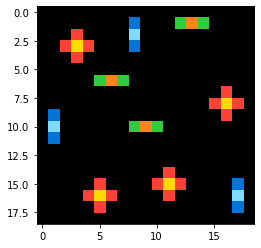

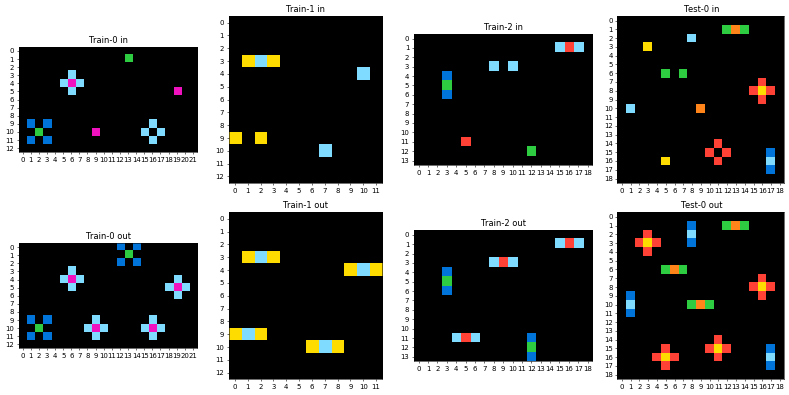

In [35]:
for i in range(400):
    task = Trains[i]
    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        proposed_solution = Solve_juxt(basic_task)
        if proposed_solution != -1:
            print(i,j)
            plot_picture(proposed_solution)
            
            plot_task(task)
            

In [36]:
A=[[0,0,1,1,2,2,1],[0,0,0,1,1,1,1],[0,0,0,1,1,1,1],[0,0,0,1,1,1,1],[0,0,0,1,1,1,1],[0,0,0,1,1,1,2]]
B=[[0,0,0,0,0,0,0],[0,0,0,1,1,0,1],[0,0,0,0,0,0,0],[0,0,0,0,0,1,0],[0,0,0,1,2,0,0],[0,0,0,1,0,0,1]]
C=[[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]]

In [127]:
len(np.nonzero(np.unique(A))[0])

2

In [163]:
#juxt pattern to whole image
#list list
def juxt_pattern_to_image1(pattern_list,image):
    image_array=np.pad(image,((1,1),(1,1)),"constant",constant_values=0)
    image_array_copy=image_array.copy()
    m,n=len(image),len(image[0])
    
#     def min_req(pattern,image_part):
#         res=[]
#         b=list(np.nonzero(np.unique(image_part))[0])
#         for i in range(1,len(color_counts(pattern))):
#             if  i in b:
#                 res.append(color_counts(pattern)[i])
#         if len(res)==0:
#             return -1

#         return min(res)
    
    while True:
        
        max_pro=0
        for pat in range(len(pattern_list)):
            pattern=pattern_list[pat]
        
            pattern_array=np.array(pattern)
            a=len(pattern)
            b=len(pattern[0])
            for i in range(1,m-a+1+1):
                for j in range(1,n-b+1+1):
                    tmp_image=image_array[i:i+a,j:j+b].tolist()
                    if np.sum(image_array[i:i+a,j:j+b])!=np.sum(image_array[i-1:i+a+1,j-1:j+b+1]) or -1 in tmp_image:

                        continue

                    if is_juxt(pattern,tmp_image)!=0:
                        max_pro=max(max_pro,is_juxt(pattern,tmp_image))
                    if max_pro==1:
                        break
#         print(image_array)
#         print(image_array_copy)
        if max_pro==0:
            return image_array_copy[1:-1,1:-1].tolist()
        for pat in range(len(pattern_list)):
            pattern=pattern_list[pat]
        
            pattern_array=np.array(pattern)
            a=len(pattern)
            b=len(pattern[0])


           

            for i in range(1,m-a+1+1):
                for j in range(1,n-b+1+1):
                    tmp_image=image_array[i:i+a,j:j+b].tolist()

                    if is_juxt(pattern,tmp_image)==max_pro:

                        image_array_copy[i:i+a,j:j+b]=pattern_array

                        image_array[i:i+a,j:j+b]=-1


In [164]:

def Solve_juxt_trans(basic_task): 
    # returns -1 if no match is found
    # returns Transformed_Test_Case  if the mathching rule is found
    # for this notebook we only look at mul color match
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    solved=True
    pattern_being=True
    for x, y in zip(Input,Output):
        #plot_picture(x)
        pattern=[]
        a=split_object801(x)
        maxcolor=0
        for j in range(len(a)):
            
            localmax=len(np.nonzero(np.unique(a[j]["obj"]))[0])
            maxcolor=max(localmax,maxcolor)
        for j in range(len(a)):
            if len(np.nonzero(np.unique(a[j]["obj"]))[0])==maxcolor:
                pattern.append(a[j]["obj"])
                if issubarray(y,a[j]["obj"])==False:
                    pattern_being=False
                    
                    tmp=a[j]["obj"]
                    for i1 in range(len(x)):
                        for j1 in range(len(x[0])):
                            x_array_tmp=np.array(x)
                            tmp_image=x_array_tmp[i1:i1+len(tmp),j1:j1+len(tmp[0])].tolist()
                            if tmp_image==tmp:
                                x_array_tmp[i1:i1+len(tmp),j1:j1+len(tmp[0])]=0
                                x=x_array_tmp.tolist()
                

                pattern.append(Vert(a[j]["obj"]))
                pattern.append(Hor(a[j]["obj"]))
                pattern.append(Rot2(a[j]["obj"]))
                pattern.append(Rot1(a[j]["obj"]))
                pattern.append(Rot1(Rot1(a[j]["obj"])))
                pattern.append(Vert(Rot2(a[j]["obj"])))
                pattern.append(Hor(Rot2(a[j]["obj"])))


        
        if len(pattern)<1:
            return -1
        y_juxt=juxt_pattern_to_image1(pattern,x)
#         plot_picture(y_juxt)
#         plot_picture(y)
#         print(y_juxt==y)

        if y!=y_juxt:
            solved=False
            break
    if solved==True:
        x=Test_Case
        pattern=[]
        a=split_object801(x)
        maxcolor=0
        for j in range(len(a)):
            localmax=len(np.nonzero(np.unique(a[j]["obj"]))[0])
            maxcolor=max(localmax,maxcolor)
        for j in range(len(a)):
            if len(np.nonzero(np.unique(a[j]["obj"]))[0])==maxcolor:
                pattern.append(a[j]["obj"])
                if pattern_being==False:
                    tmp=a[j]["obj"]
                    for i1 in range(len(x)):
                        for j1 in range(len(x[0])):
                            x_array_tmp=np.array(x)
                            tmp_image=x_array_tmp[i1:i1+len(tmp),j1:j1+len(tmp[0])].tolist()
                            if tmp_image==tmp:
                                x_array_tmp[i1:i1+len(tmp),j1:j1+len(tmp[0])]=-1
                                x=x_array_tmp.tolist()
                    

                pattern.append(Vert(a[j]["obj"]))
                pattern.append(Hor(a[j]["obj"]))
                pattern.append(Rot2(a[j]["obj"]))
                pattern.append(Rot1(a[j]["obj"]))
                pattern.append(Rot1(Rot1(a[j]["obj"])))
                pattern.append(Vert(Rot2(a[j]["obj"])))
                pattern.append(Hor(Rot2(a[j]["obj"])))
            
        
        if len(pattern)<1:
            return -1
        y_juxt=juxt_pattern_to_image1(pattern,x)
        return y_juxt
    else:
        return -1
        

            


17 0


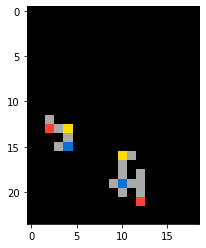

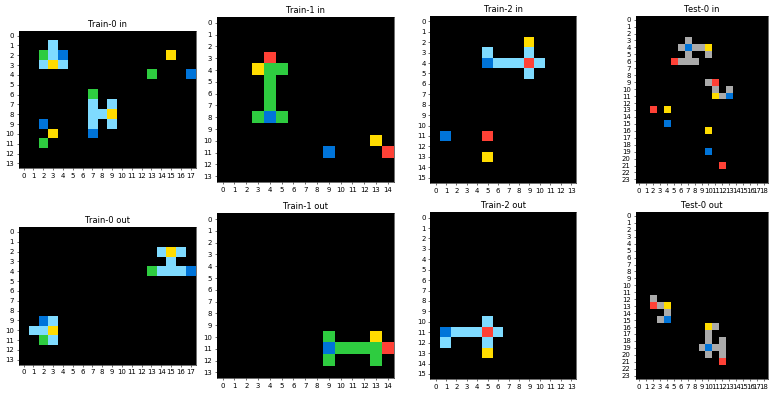

75 0


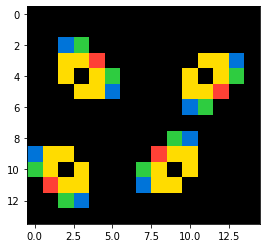

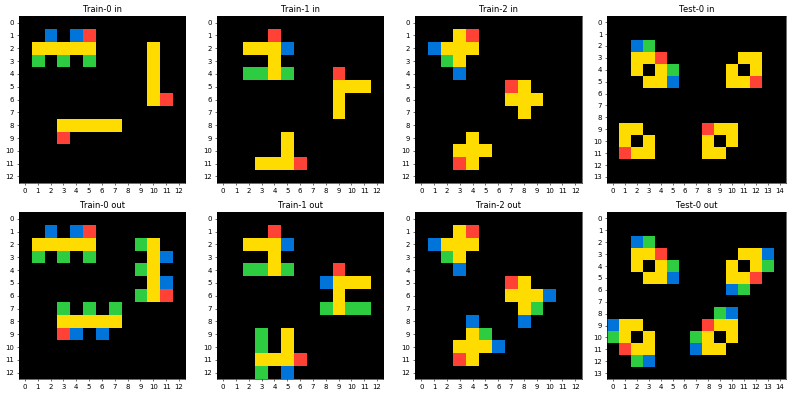

172 0


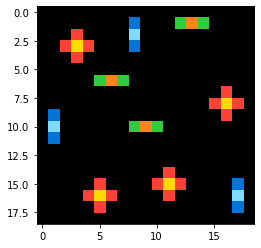

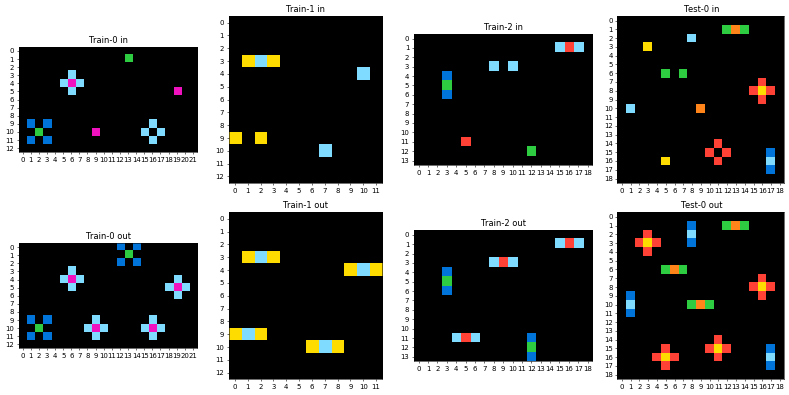

In [165]:
for i in range(400):
    task = Trains[i]
    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        proposed_solution = Solve_juxt_trans(basic_task)
        if proposed_solution != -1:
            print(i,j)
            plot_picture(proposed_solution)
            
            plot_task(task)

In [187]:

def Solve_juxt_enlarge(basic_task): 
    # returns -1 if no match is found
    # returns Transformed_Test_Case  if the mathching rule is found
    # for this notebook we only look at mul color match
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    solved=True
    pattern_being=True
    for x, y in zip(Input,Output):
        #plot_picture(x)
        pattern=[]
        a=split_object801(x)
        maxcolor=0
        for j in range(len(a)):
            
            localmax=len(np.nonzero(np.unique(a[j]["obj"]))[0])
            maxcolor=max(localmax,maxcolor)
        for j in range(len(a)):
            if len(np.nonzero(np.unique(a[j]["obj"]))[0])==maxcolor:
                pattern.append(a[j]["obj"])
                if issubarray(y,a[j]["obj"])==False:
                    pattern_being=False
                    
                    tmp=a[j]["obj"]
                    for i1 in range(len(x)):
                        for j1 in range(len(x[0])):
                            x_array_tmp=np.array(x)
                            tmp_image=x_array_tmp[i1:i1+len(tmp),j1:j1+len(tmp[0])].tolist()
                            if tmp_image==tmp:
                                x_array_tmp[i1:i1+len(tmp),j1:j1+len(tmp[0])]=0
                                x=x_array_tmp.tolist()
                
                max_large=min(len(x)//len(a[j]["obj"]),len(x[0])//len(a[j]["obj"][0]))
                for l in range(1,max_large):
                    if l<5:
                        pattern.append(np.repeat(np.repeat(np.array(a[j]["obj"]), l, axis=0), l, axis=1).tolist())
                        



        
        if len(pattern)<1:
            return -1
        y_juxt=juxt_pattern_to_image1(pattern,x)
#         plot_picture(y_juxt)
#         plot_picture(y)
#         print(y_juxt==y)

        if y!=y_juxt:
            solved=False
            break
    if solved==True:
        x=Test_Case
        pattern=[]
        a=split_object801(x)
        maxcolor=0
        for j in range(len(a)):
            localmax=len(np.nonzero(np.unique(a[j]["obj"]))[0])
            maxcolor=max(localmax,maxcolor)
        for j in range(len(a)):
            if len(np.nonzero(np.unique(a[j]["obj"]))[0])==maxcolor:
                pattern.append(a[j]["obj"])
                if pattern_being==False:
                    tmp=a[j]["obj"]
                    for i1 in range(len(x)):
                        for j1 in range(len(x[0])):
                            x_array_tmp=np.array(x)
                            tmp_image=x_array_tmp[i1:i1+len(tmp),j1:j1+len(tmp[0])].tolist()
                            if tmp_image==tmp:
                                x_array_tmp[i1:i1+len(tmp),j1:j1+len(tmp[0])]=-1
                                x=x_array_tmp.tolist()
                    

                max_large=min(len(x)//len(a[j]["obj"]),len(x[0])//len(a[j]["obj"][0]))
                for l in range(1,max_large):
                    if l<5:
                        pattern.append(np.repeat(np.repeat(a[j]["obj"], l, axis=0), l, axis=1).tolist())
            
        
        if len(pattern)<1:
            return -1
        y_juxt=juxt_pattern_to_image1(pattern,x)
        return y_juxt
    else:
        return -1
        

            


172 0


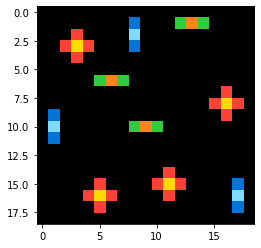

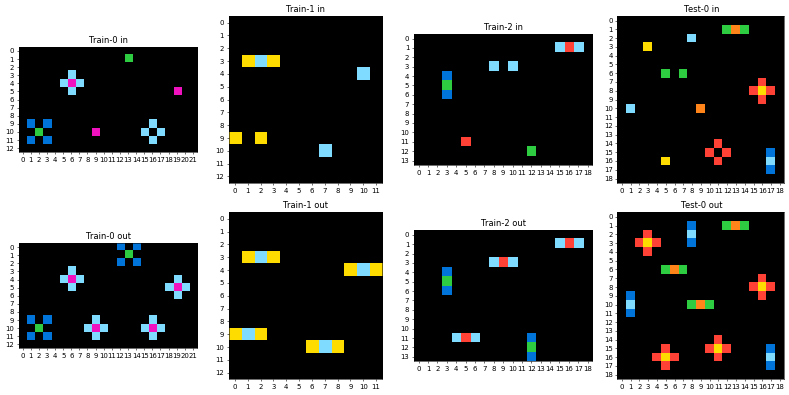

In [188]:
for i in range(400):
    task = Trains[i]
    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        proposed_solution = Solve_juxt_enlarge(basic_task)
        if proposed_solution != -1:
            print(i,j)
            plot_picture(proposed_solution)
            
            plot_task(task)